# **UNLOCKING REAL ESTATE SUCCESS WITH TIME SERIES MODELLING**

This is a collaborative group project done at the end of Phase 4 of Moringa School's Data Science program. The team members of this group include:

- [Abdideq Adan](https://github.com/AdanAbdideq)
- [Clara Gatambia](https://github.com/claragatambia)
- [Isaack Odera](https://github.com/derak-isaack)
- [Mwiti Mwongo](https://github.com/M13Mwongo)
- [Wilson Mutungu](https://github.com/mutungu)

## 1. BUSINESS UNDERSTANDING

TODO - Answer a sample question like why prices would be different in different states but one state may be more expensive on average than another

TODO - Analysis into the market trends (e.g. 2008 financial crash) and how the model may account for that in future (market trend analysis)

TODO - More important to show in depth analysis i.e. data prep and eda

TODO - Think as the investor in this area

### Problem Statement

Real estate represents a significant portion of most people's wealth, and this is especially true for many homeowners in the United States. A number of factors drive the real estate market including government policies, demographics of the potential buyers,affordability, disparity in housing access, location, cash flows and liquidity as well as the current economic climate. The many variables can make the process tedious for the buyers. Naruto consultants hopes to create a predictive time series model that can help to determine the top five zipcodes in which to invest in.

### Objectives
The main objective of the project is to establish the 5 best zip codes that are the best to invest in.

The objectives of this project are as follows:
 - Identify the key metrics that would be used to classify profitability.
 - Identify the criteria that would classify a house as a "high-end" house or "affordable" house.

The model will be considered a success if it achieves a RMSE of less than 5% and the highest ROI.

### Potential Challenges
- Potentially large amounts of missing data with no conclusive reason, forcing assumptions to be made.
- Some trends may be hard to explain due to differences in locale and perceptions of some matters


## PRELIMINARIES

### Loading of Necessary Modules/Packages

All necessary python packages are loaded at once to make the work easy to view and cleaner as well. 

In [1]:
# Importing necessary libraries
# Basics
import pandas as pd
import numpy as np
import itertools
from io import StringIO

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.pylab import rcParams
import time

# Modeling
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from sklearn.linear_model import LassoLarsCV

# Warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')

# Custom Options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',100)


### Definition of Custom Classes / Functions

In line with the concepts of OOP, custom classes were created to speed up the opening and manipulation of data in this project. They are as follows: 

In [2]:
def plot_barplot(dataframe,x,y,x_title,y_title):
  fig,ax = plt.subplots(figsize=(10,8))
  
  sns.barplot(data = dataframe,x=x, y=y,orient='h',errorbar=None)
  ax.set_title(f"{y_title} vs {x_title}")
  ax.set_xlabel(x_title)
  ax.set_ylabel(y_title)
  plt.show()


def plot_histogram(dataframe, x, y, x_title, y_title):
  fig, ax = plt.subplots(figsize=(10, 8))

  sns.histplot(data=dataframe, x=x, y=y, kde=True)
  ax.set_title(f"{y_title} vs {x_title}")
  ax.set_xlabel(x_title)
  ax.set_ylabel(y_title)
  plt.show()

def plot_boxplot(dataframe,x,y,x_title,y_title):
  fig,ax = plt.subplots(figsize=(10,8))
  
  sns.boxplot(data = dataframe,x=x, y=y)
  ax.set_title(f"{y_title} vs {x_title}")
  ax.set_xlabel(x_title)
  ax.set_ylabel(y_title)
  plt.xticks(rotation=90)
  plt.show()

## 2. DATA UNDERSTANDING

### a) Loading & Viewing Data

We start by loading the data as a dataframe.

In [3]:
df = pd.read_csv('./data/zillow_data.csv')

The `df.head()` function is used to get a rough look at a few of the records in the dataframe to understand the data better.

In [4]:
df.head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,...,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,...,863900.0,872900.0,883300.0,889500.0,892800,893600,891300,889900,891500,893000,893000,895000,901200,909400,915000,916700,917700,919800,925800,937100,948200,951000,952500,958600,966200,970400,973900,974700,972600,974300,980800,988000,994700,998700,997000,993700,991300,989200,991300,999100,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,215800.0,211100.0,205700.0,200900.0,196800.0,193600.0,191400.0,190400.0,190800.0,192700.0,196000.0,201300.0,207400.0,212200.0,214600.0,215100.0,213400.0,210200.0,206100.0,202100.0,198800.0,196100.0,194100.0,193400.0,193400.0,193100.0,192700.0,193000.0,193700.0,194800.0,196100.0,197800.0,199700.0,201900.0,...,234200.0,235400.0,236600.0,238500.0,240500,242600,244700,246300,247600,249600,251400,253000,255200,258000,261200,264700,268400,271400,273600,275200,276400,277000,277900,280000,282600,285400,288400,290800,292000,292800,293700,295200,297000,299000,300800,301800,302800,304400,306200,307000,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,195400.0,193000.0,191800.0,191800.0,193000.0,195200.0,198400.0,202800.0,208000.0,213800.0,220700.0,227500.0,231800.0,233400.0,233900.0,233500.0,233300.0,234300.0,237400.0,242800.0,250200.0,258600.0,268000.0,277000.0,283600.0,288500.0,293900.0,299200.0,304300.0,308600.0,311400.0,312300.0,311900.0,...,282100.0,284200.0,286000.0,288300.0,290700,293300,295900,298300,300200,301300,301700,302400,303600,306200,309100,311900,314100,316300,319000,322000,324300,326100,327300,327000,327200,328500,329800,330000,329000,327800,326700,325500,324700,324500,323700,322300,320700,320000,320000,320900,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,503400.0,502200.0,500000.0,497900.0,496300.0,495200.0,494700.0,494900.0,496200.0,498600.0,502000.0,507600.0,514900.0,522200.0,529500.0,537900.0,546900.0,556400.0,566100.0,575600.0,584800.0,593500.0,601600.0,610100.0,618600.0,625600.0,631100.0,636600.0,642100.0,647600.0,653300.0,659300.0,665800.0,672900.0,...,1149900.0,1155200.0,1160100.0,1163300.0,1167700,1173900,1175100,1173500,1175500,1178500,1176400,1174600,1178500,1185700,1192900,1198800,1200400,1198900,1200200,1207400,1218600,1226600,1230700,1235400,1241300,1245700,1247000,1246700,1245700,1246000,1247700,1252900,1260900,1267900,1272600,1276600,1280300,1282500,1286000,1289000,1289800,1287700,1287400,1291500,1296600,129900

The `df.info()` and `df.dtypes` functions are both called to give a rough understanding of the dataframe, and the types of data held in each column. Normally, `df.info()` would be sufficient, but due to the sheer number of columns in the dataframe, that information isn't displayed. Thus, `df.dtypes` is called. 

In [5]:
print(df.info())
print()
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB
None

RegionID        int64
RegionName      int64
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
1996-04       float64
1996-05       float64
1996-06       float64
1996-07       float64
1996-08       float64
1996-09       float64
1996-10       float64
1996-11       float64
1996-12       float64
1997-01       float64
1997-02       float64
1997-03       float64
1997-04       float64
1997-05       float64
1997-06       float64
1997-07       float64
1997-08       float64
1997-09       float64
1997-10       float64
1997-11       float64
1997-12       float64
1998-01       float64
1998-02       float64
1998-03       float64
1998-04       float64
1998-05       float64
1998-06       float64
1998-07       float64
1998-08       float64
1998-09       floa

As expected, all the columns representing time-series data will be storing either an integer or a float data type. It is also important to note that the `RegionID` & `RegionName` are stored as integers - to ensure they are unique - and the remaining 5 columns all contain strings.

The shape of the dataframe was observed as follows: 

In [6]:
df.shape

(14723, 272)

The dataframe has 14723 records and 272 column. However, majority of those columns represent the time series values. The first seven columns - `RegionID`, `RegionName`, `City`, `State`, `Metro`, `CountyName` and `SizeRank` - are the columns that give us more information about the dataset. 

Each of these columns is intended to hold a certain type of data as follows: 
- *RegionID*: The unique ID of the region in question.
- *RegionName*: The name of the region in question.
- *City*: The name of the city within a given region.
- *State*: The state in which the RegionID is found.
- *Metro*: The metropolitan name within which the RegionID is found.
- *CountyName*: The name of the county within a given region.
- *SizeRank*: The region's area ranking vis-a-vis other regions, organised in descending order.

Going forward, these columns shall be referred to as the `columns of interest`, while the remaining columns shall be referred to as the `time_series_cols`.

In [7]:
# ['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName','SizeRank']

cols_of_interest = df.columns[:7]
cols_of_interest

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank'],
      dtype='object')

In [8]:
time_series_cols = df.columns[-265:]
time_series_cols

Index(['1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09',
       '1996-10', '1996-11', '1996-12', '1997-01',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=265)

### b) Data Cleaning

#### **i. Handling of Null Values**

The number of null values in the dataframe will now be established. This is necessary to ensure an appropriate strategy is used when deciding how to handle null values

In [9]:
df.isnull().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
CountyName       0
SizeRank         0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
1997-05       1039
1997-06       1039
1997-07       1038
1997-08       1038
1997-09       1038
1997-10       1038
1997-11       1038
1997-12       1038
1998-01       1036
1998-02       1036
1998-03       1036
1998-04       1036
1998-05       1036
1998-06       1036
1998-07       1036
1998-08       1036
1998-09       1036
1998-10       1036
1998-11       1036
1998-12       1036
1999-01       1036
1999-02       1036
1999-03       1036
1999-04       1036
1999-05       1036
1999-06       1036
1999-07       1036
1999-08       1036
1999-09       1036
1999-10       1036
1999-11       1036
1999-12       1036
2000-01     

Aside from the columns that contain time-series values, only the metro column has null values. This can be seen as inconsequential as there is enough data from the other columns to overlook this. 

Taking a closer look at the missing time-series values, there seems to be a steady trend. The values do not appear to be random, as they steadily decrease from April 1996 to July 2014, from where they remain 0 throughout till April 2018.

The gradual change indicates that the presence of null values in these columns is anything but random. As such, when dealing with the null values in the time-series value columns, **all null values will be left as is**. No replacement or removal of records will be done. This is done as it is assumped that not all the houses were built at the same time, thus it is expected that there will be null values for some houses and not others. Furthermore, some of these null values are attributed to the differential times that the houses were put on the market.

When dealing with the null values in the metro column, all null values will be left as the data missing does not impact the objectives of the project. 



#### **ii. Duplicate Values Check**

A check for duplicate values is done. This check specifically applies to the non time-series columns, as it possible to have duplicates in the value of a property, and such duplicates do not serve to understand the dataset better.

In [10]:
duplicates = df.duplicated(subset=cols_of_interest,keep=False)

df[duplicates]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,...,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04


No duplicates are observed in the dataset.

#### **iii. Consistent Data Types**

Having run `df.dtypes` earlier, it was noted that some of the price data in the time-series columns was saved as integers while others were saved as floats. All the data in the time-series columns will now be converted to floats since by doing so, we are sure we are not losing/ rounding off any of the price values. 

In [11]:
# Ensuring all time series columns are converted to float64 i.e. the last 265 columns

for col in time_series_cols:
  if df[col].dtype is not 'float64':
    df[col] = df[col].astype('float64')


df.dtypes

RegionID        int64
RegionName      int64
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
1996-04       float64
1996-05       float64
1996-06       float64
1996-07       float64
1996-08       float64
1996-09       float64
1996-10       float64
1996-11       float64
1996-12       float64
1997-01       float64
1997-02       float64
1997-03       float64
1997-04       float64
1997-05       float64
1997-06       float64
1997-07       float64
1997-08       float64
1997-09       float64
1997-10       float64
1997-11       float64
1997-12       float64
1998-01       float64
1998-02       float64
1998-03       float64
1998-04       float64
1998-05       float64
1998-06       float64
1998-07       float64
1998-08       float64
1998-09       float64
1998-10       float64
1998-11       float64
1998-12       float64
1999-01       float64
1999-02       float64
1999-03       float64
1999-04       float64
1999-05       float64
1999-06   

### c) Data Handling

#### **i. Aggregation of Data**

As all values in the time-series columns are deemed important, aggregating the data to a yearly basis, for example, at such an early stage was deemed unnecessary. This is because a lot of vital information would be lost in the process that would be necessary later on. Thus, aggregation would be done on an as-needed basis.

#### **ii. Grouping of Data**

Data will now be grouped by state, to give a better idea as to which states have more property listings than others:

In [12]:
df[['State', 'RegionID','RegionName','City','Metro','CountyName','SizeRank']].groupby("State").count()

,RegionID,RegionName,City,Metro,CountyName,SizeRank
State,,,,,,
AK,28,28,28,22,28,28
AL,183,183,183,175,183,183
AR,105,105,105,100,105,105
AZ,230,230,230,228,230,230
CA,1224,1224,1224,1182,1224,1224
CO,249,249,249,229,249,249
CT,124,124,124,124,124,124
DC,18,18,18,18,18,18
DE,41,41,41,41,41,41


Particular focus will be placed on the `RegionID` as that column does not have any null values, thus an accurate count of properties can be done. This column will appropriately be renamed to `Count of Properties` as it signifies the count of properties in a particular state.

In [13]:
df_state_grouping = df[['State', 'RegionID']].groupby(
    "State").count().sort_values(by='RegionID', ascending=False)
df_state_grouping.reset_index(inplace=True)
df_state_grouping.rename(columns={'RegionID': 'Count of Properties'}, inplace=True)
df_state_grouping

,State,Count of Properties
0,CA,1224
1,NY,1015
2,TX,989
3,PA,831
4,FL,785
5,OH,588
6,IL,547
7,NJ,502
8,MI,499
9,IN,428


California (CA) is seen to have the most listings with 1224, followed closely by New York, NY (1015) and Texas, TX (989). Vermont (VT), Washington DC (DC) and San Diego (SD) have the least listings at 16, 18 and 19 respectively. 

#### **iii. Presence of Outliers** 

There will be outliers present in the data, that will be more apparent in the EDA section. These outliers may come around as a result of over-inflated house prices, or simply having houses marked below their market value by owners who are in a rush to sell. Whatever the case may be, the outliers in the dataset **will be kept throughout the analysis**. 

These outliers play an important role in developing a more realistic model, as the world of real-estate will always have overpriced or underpriced properties that do not conform to the norms. Keeping these outliers in will serve to create a more realistic model.

### d) Feature Engineering

#### **i. Addition of New Features** 

Relevant features that could affect house prices were noted and their creation was deemed necessary. These features are: 

- *Return On Investment(ROI)(%)*: Calculated as 
$
\left( \frac{{\text{{Last Price of Property}}}}{{\text{{Initial Price of Property}}}} - 1 \right) \times 100\% 
$

As we know that the latter, and in particular the last time-series column, has no null values, this column will automatically be our numerator (i.e. `df.columns[271]`). As for the denominator, it's value will be occuppied by the oldest datetime that is not a null value. Therefore, the calculation of the ROI was done as follows:

In [14]:
df_feature_engineered = df.copy()

for index, row in df_feature_engineered.iterrows():
  # Establishing the last price of the property
  last_price = df_feature_engineered.columns[271]

  # Establishing the initial price of the property
  initial_price = 0

  # Loop through time_series_cols to find the first non-null value
  for col in time_series_cols:
      initial_price = df_feature_engineered[col].values[index]
      if not pd.isnull(initial_price):
        # print(f"Record {index} initial price: {initial_price} @ {col}")
        break
  df_feature_engineered.at[index, 'Initial Price'] = initial_price
  
  df_feature_engineered['Last Price'] = df[last_price]
  
  df_feature_engineered['ROI (%)'] = round(
      (((df_feature_engineered['Last Price'] / df_feature_engineered['Initial Price']) - 1) * 100), 2)

df_feature_engineered.head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,...,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Initial Price,Last Price,ROI (%)
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,...,889500.0,892800.0,893600.0,891300.0,889900.0,891500.0,893000.0,893000.0,895000.0,901200.0,909400.0,915000.0,916700.0,917700.0,919800.0,925800.0,937100.0,948200.0,951000.0,952500.0,958600.0,966200.0,970400.0,973900.0,974700.0,972600.0,974300.0,980800.0,988000.0,994700.0,998700.0,997000.0,993700.0,991300.0,989200.0,991300.0,999100.0,1005500.0,1007500.0,1007800.0,1009600.0,1013300.0,1018700.0,1024400.0,1030700.0,1033800.0,1030600.0,334200.0,1030600.0,208.38
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,215800.0,211100.0,205700.0,200900.0,196800.0,193600.0,191400.0,190400.0,190800.0,192700.0,196000.0,201300.0,207400.0,212200.0,214600.0,215100.0,213400.0,210200.0,206100.0,202100.0,198800.0,196100.0,194100.0,193400.0,193400.0,193100.0,192700.0,193000.0,193700.0,194800.0,196100.0,197800.0,199700.0,201900.0,...,238500.0,240500.0,242600.0,244700.0,246300.0,247600.0,249600.0,251400.0,253000.0,255200.0,258000.0,261200.0,264700.0,268400.0,271400.0,273600.0,275200.0,276400.0,277000.0,277900.0,280000.0,282600.0,285400.0,288400.0,290800.0,292000.0,292800.0,293700.0,295200.0,297000.0,299000.0,300800.0,301800.0,302800.0,304400.0,306200.0,307000.0,308000.0,310000.0,312500.0,314100.0,315000.0,316600.0,318100.0,319600.0,321100.0,321800.0,235700.0,321800.0,36.53
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,195400.0,193000.0,191800.0,191800.0,193000.0,195200.0,198400.0,202800.0,208000.0,213800.0,220700.0,227500.0,231800.0,233400.0,233900.0,233500.0,233300.0,234300.0,237400.0,242800.0,250200.0,258600.0,268000.0,277000.0,283600.0,288500.0,293900.0,299200.0,304300.0,308600.0,311400.0,312300.0,311900.0,...,288300.0,290700.0,293300.0,295900.0,298300.0,300200.0,301300.0,301700.0,302400.0,303600.0,306200.0,309100.0,311900.0,314100.0,316300.0,319000.0,322000.0,324300.0,326100.0,327300.0,327000.0,327200.0,328500.0,329800.0,330000.0,329000.0,327800.0,326700.0,325500.0,324700.0,324500.0,323700.0,322300.0,320700.0,320000.0,320000.0,320900.0,321000.0,320600.0,320200.0,320400.0,320800.0,321200.0,321200.0,323000.0,326900.0,329900.0,210400.0,329900.0,56.80
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,503400.0,502200.0,500000.0,497900.0,496300.0,495200.0,494700.0,494900.0,496200.0,498600.0,502000.0,507600.0,514900.0,522200.0,529500.0,537900.0,546900.0,556400.0,566100.0,575600.0,584800.0,593500.0,601600.0,610100.0,618600.0,625600.0,631100.0,636600.0,642100.0,647600.0,653300.0,659300.0,665800.0,672900.0,...,1163300.0,1167700.0,1173900.0,1175100.0,1173500.0,1175500.0,1178500.0,1176400.0,1174600.0,117850

#### **ii. Normalization/ Scaling**

Having gone through the data, no different scales are noticed. However, there may be a need for normalization when it comes to comparing regions with vastly different quantities of properties listed that have a variety of prices. This is to ensure that the comparison is as accurate as possible and without an inherent bias or skew. This shall be done later on in the EDA stages on an as-needed basis

A new dataframe is now created which contains the melted data. This will convert the original dataframe `df` from wide to long format. This will be done by applying the custom function `melt_data`

In [15]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """

    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank',
                     'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value': 'mean'})

Converting the dataframe to long format:

In [16]:
df_melted = melt_data(df)

## 3. EDA & VISUALISATION

### Descriptive Statistics

The mean, median & standard deviation (as well as other statistics) are seen here: 

In [17]:
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,...,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,...,1.466700e+04,1.466700e+04,1.466700e+04,1.466700e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,1.193454e+05,1.196851e+05,1.201213e+05,1.205442e+05,1.208966e+05,1.212682e+05,1.216559e+05,1.220531e+05,1.224563e+05,1.228799e+05,1.233274e+05,1.238231e+05,1.243537e+05,1.250026e+05,1.257367e+05,1.264508e+05,1.270863e+05,1.277364e+05,1.283850e+05,1.290327e+05,1.296764e+05,1.303245e+05,1.309826e+05,1.316781e+05,1.323993e+05,1.332247e+05,1.341336e+05,1.350209e+05,1.358416e+05,1.366838e+05,1.375321e+05,1.383918e+05,1.392652e+05,1.401606e+05,1.410848e+05,1.420701e+05,1.431040e+05,1.442613e+05,1.455221e+05,1.467723e+05,...,2.250826e+05,2.261248e+05,2.272320e+05,2.283106e+05,2.290993e+05,2.301417e+05,2.310600e+05,2.319275e+05,2.328221e+05,2.337123e+05,2.346912e+05,2.357603e+05,2.368364e+05,2.380098e+05,2.393542e+05,2.407441e+05,2.421035e+05,2.434244e+05,2.446583e+05,2.457646e+05,2.467650e+05,2.477652e+05,2.488964e+05,2.499873e+05,2.510143e+05,2.521643e+05,2.534836e+05,2.548201e+05,2.562058e+05,2.575979e+05,2.589460e+05,2.602543e+05,2.615769e+05,2.629238e+05,2.643733e+05,2.657551e+05,2.670651e+05,2.685335e+05,2.702268e+05,2.718247e+05,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,8.747981e+04,8.791269e+04,8.840935e+04,8.887373e+04,8.927704e+04,8.969700e+04,9.012583e+04,9.056147e+04,9.100389e+04,9.146850e+04,9.196320e+04,9.250608e+04,9.308367e+04,9.374830e+04,9.445247e+04,9.510499e+04,9.567485e+04,9.624843e+04,9.681400e+04,9.737949e+04,9.794880e+04,9.853754e+04,9.915791e+04,9.983302e+04,1.005517e+05,1.013752e+05,1.022670e+05,1.031269e+05,1.039398e+05,1.048064e+05,1.057199e+05,1.066999e+05,1.077590e+05,1.089064e+

### Data Analysis

The listings per state were looked at and plotted on a simple bar graph:

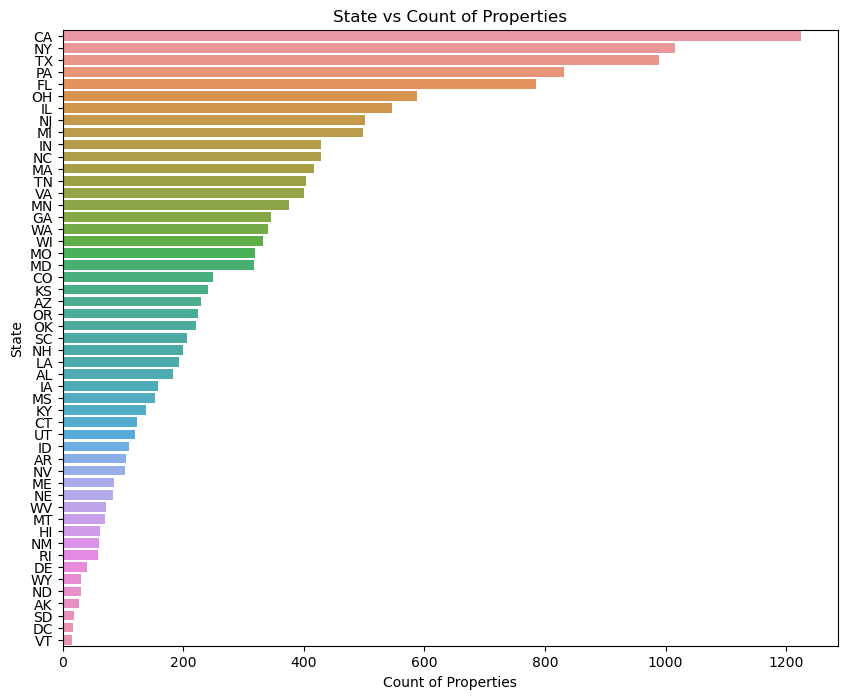

In [18]:
plot_barplot(dataframe=df_state_grouping, y='State',x='Count of Properties', y_title='State', x_title='Count of Properties')

This same analysis can be done to observe the spread of property listings in the various cities and counties.

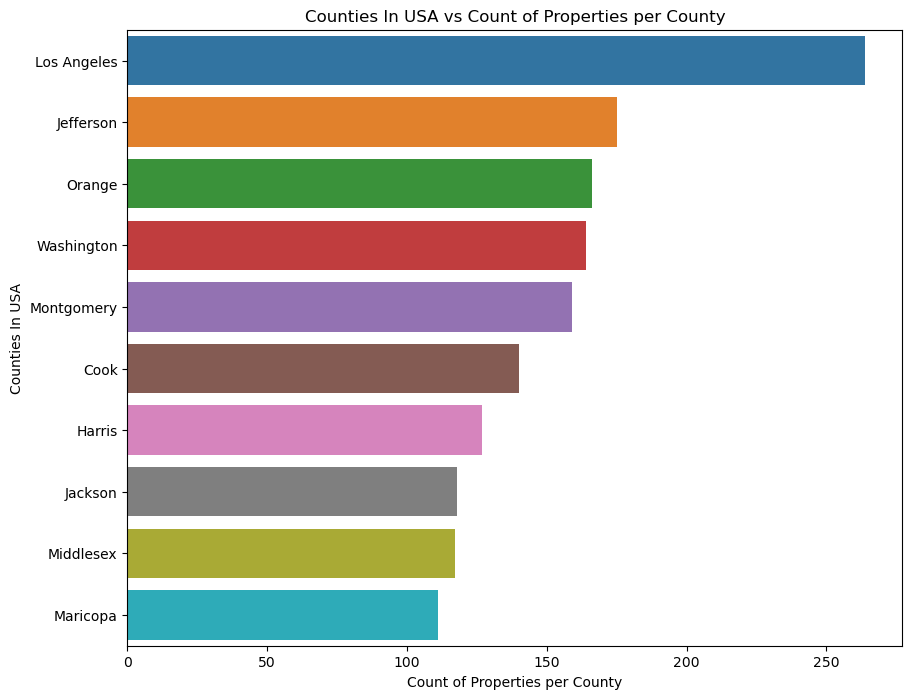

In [27]:
plot_barplot(dataframe=df[['RegionID', 'CountyName']].groupby('CountyName').count().reset_index().sort_values(
    by='RegionID', ascending=False).head(10), y='CountyName', x='RegionID', y_title='Counties In USA', x_title='Count of Properties per County')

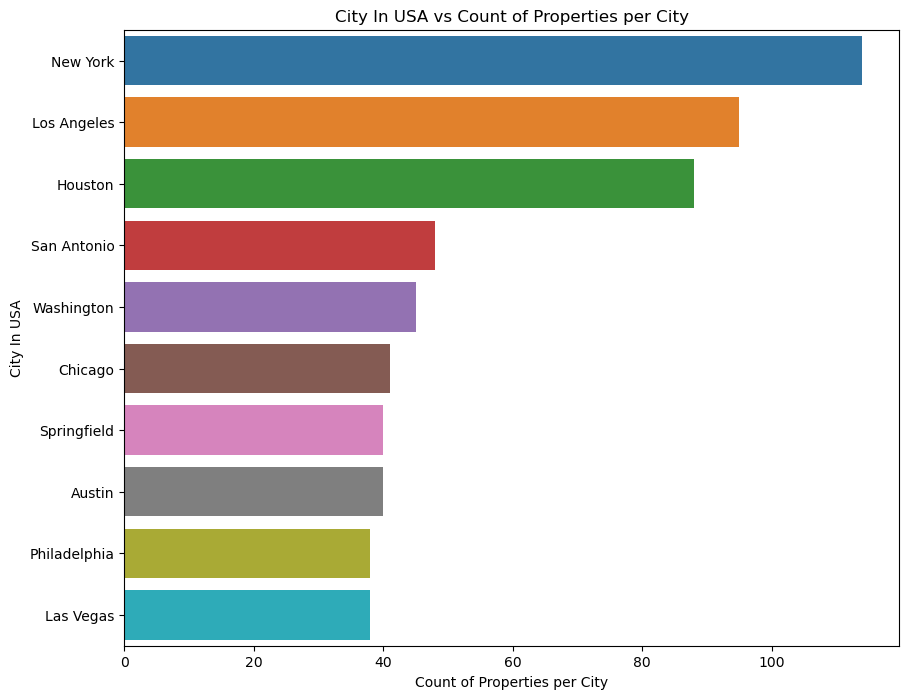

In [29]:
plot_barplot(dataframe=df[['RegionID', 'City']].groupby('City').count().reset_index().sort_values(
    by='RegionID', ascending=False).head(10), y='City', x='RegionID', y_title='City In USA', x_title='Count of Properties per City')

## 4. ARIMA MODELLING

## 5. FINE TUNING WITH PROPHET

## 6. INTERPRETING RESULTS